In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
human_voice=pd.read_csv('vocal_gender_features_new.csv')

In [4]:
human_voice

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,1879.614568,1092.394432,1802.821290,479.751352,19.930251,0.017547,3882.812500,0.116425,0.088527,1458.0010,...,12.486454,-4.034742,13.771613,-5.278946,14.380637,5.627317,9.196584,-7.411221,12.621205,1
16144,1810.603695,1124.628905,1829.785209,491.274993,19.115077,0.017356,3816.685268,0.110338,0.067830,1538.0670,...,12.727633,-2.590058,15.919325,-6.724170,14.858981,6.610045,8.266881,-6.264262,13.771297,1
16145,1820.216958,1197.520780,1770.716715,509.906085,19.506173,0.015819,3728.759766,0.105142,0.073135,1637.4955,...,12.606261,-0.207149,15.909226,-9.772965,18.003307,4.041325,9.128441,-3.483847,11.820591,1
16146,1636.619660,1055.832051,1747.968472,500.649272,19.118411,0.014007,3524.797712,0.094456,0.071088,1453.4177,...,11.453891,-2.735264,15.467333,-4.670631,12.668987,3.787537,8.726358,-7.397458,13.588392,1


In [5]:
human_voice['mfcc_2_mean']

0        49.470943
1        88.371910
2        71.867960
3        68.507675
4        81.450600
           ...    
16143    68.245280
16144    65.574410
16145    62.390747
16146    68.063930
16147    83.411880
Name: mfcc_2_mean, Length: 16148, dtype: float64

In [6]:
human_voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectral_kurtosis     

In [7]:
human_voice.describe()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
count,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,...,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000
mean,1709.269730,1027.564673,1584.195931,432.492328,20.395652,0.023086,3281.808257,0.118088,0.084759,1461.624198,...,13.537739,-0.533815,12.515116,-8.933890,10.982858,0.880024,9.721608,-6.711788,9.536517,0.642804
std,315.558063,286.303662,126.360465,78.723202,1.628596,0.010027,526.824341,0.037707,0.022814,287.763342,...,2.438230,5.593673,2.354020,5.315098,1.886158,4.314862,1.794407,4.069641,1.574890,0.479188
min,719.559285,194.998983,1106.939002,199.321584,15.154801,0.001816,1310.661765,0.027727,0.022425,359.391170,...,5.826506,-20.188465,5.459179,-26.082537,5.594748,-13.585977,4.378153,-26.402317,4.686154,0.000000
25%,1475.078509,829.195585,1503.301521,379.552391,19.775875,0.015567,2911.427574,0.089729,0.067508,1279.141250,...,11.861280,-4.521667,10.753869,-12.666048,9.641137,-2.050272,8.455685,-9.676477,8.432545,0.000000
50%,1703.038854,1048.531356,1583.959951,423.121818,20.759579,0.021737,3293.459741,0.116623,0.083121,1484.461250,...,13.306489,-0.625990,12.279825,-8.732289,10.796652,0.949182,9.595896,-6.598702,9.433592,1.000000
75%,1921.202685,1233.451527,1665.806788,477.631817,21.516436,0.029175,3637.773811,0.144095,0.100465,1662.883350,...,15.044193,3.136063,14.099204,-5.328175,12.153640,3.896141,10.863349,-3.575793,10.508087,1.000000
max,3059.390150,1912.173446,2046.070801,724.361505,24.907725,0.072172,5451.099537,0.270710,0.187577,2454.724000,...,26.693924,19.610289,22.717190,6.013963,19.685654,16.436730,17.380630,6.187790,17.941544,1.000000


In [8]:
human_voice.isnull().sum()

mean_spectral_centroid     0
std_spectral_centroid      0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
min_pitch                  0
max_pitch                  0
std_pitch                  0
spectral_skew              0
spectral_kurtosis          0
energy_entropy             0
log_energy                 0
mfcc_1_mean                0
mfcc_1_std                 0
mfcc_2_mean                0
mfcc_2_std                 0
mfcc_3_mean                0
mfcc_3_std                 0
mfcc_4_mean                0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean                0
mfcc_9_std    

In [9]:
print("Number of Duplicates:", human_voice.duplicated().sum())

Number of Duplicates: 1078


In [10]:
human_voice.drop_duplicates(inplace=True)

In [11]:
df=human_voice.columns

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
human_voice[df]=scaler.fit_transform(human_voice[df])

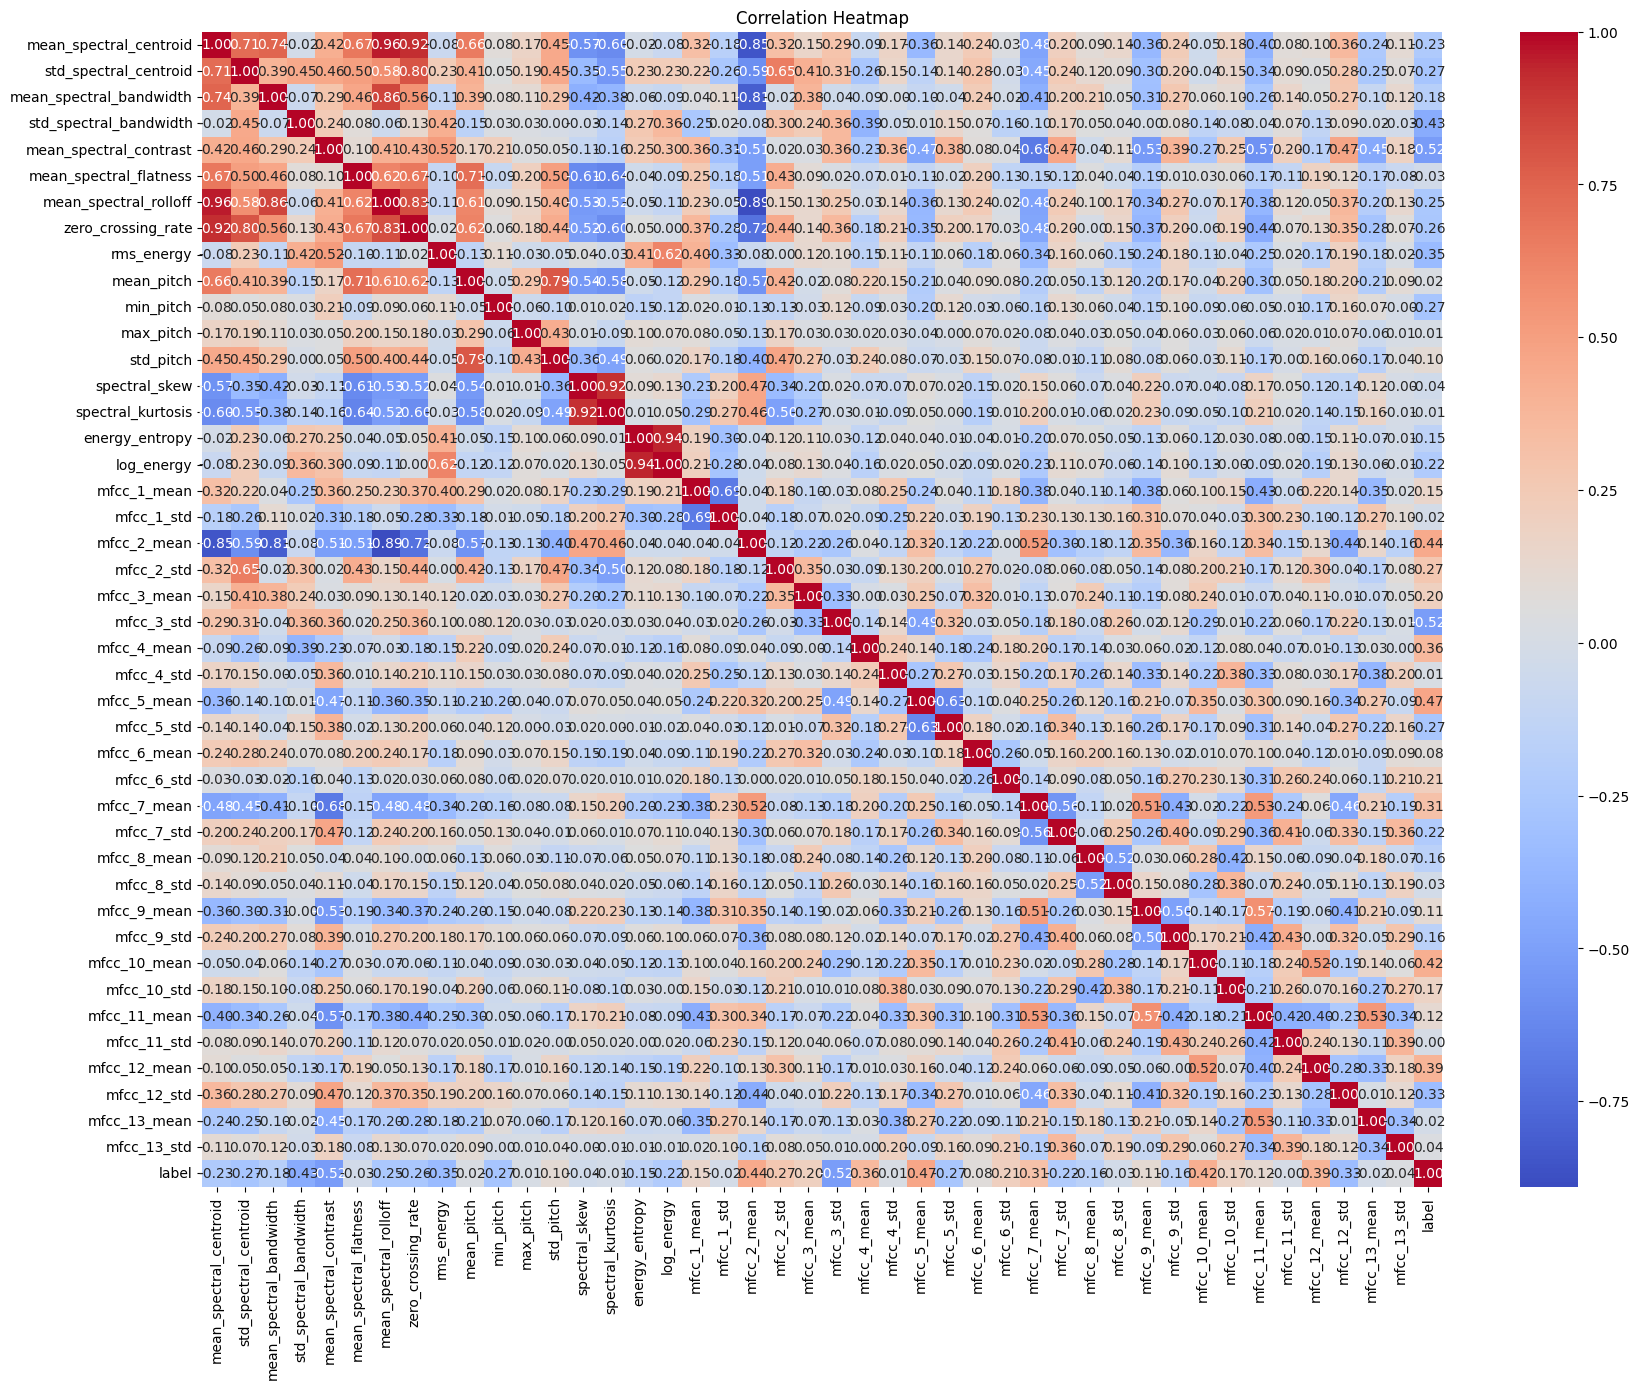

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(human_voice.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

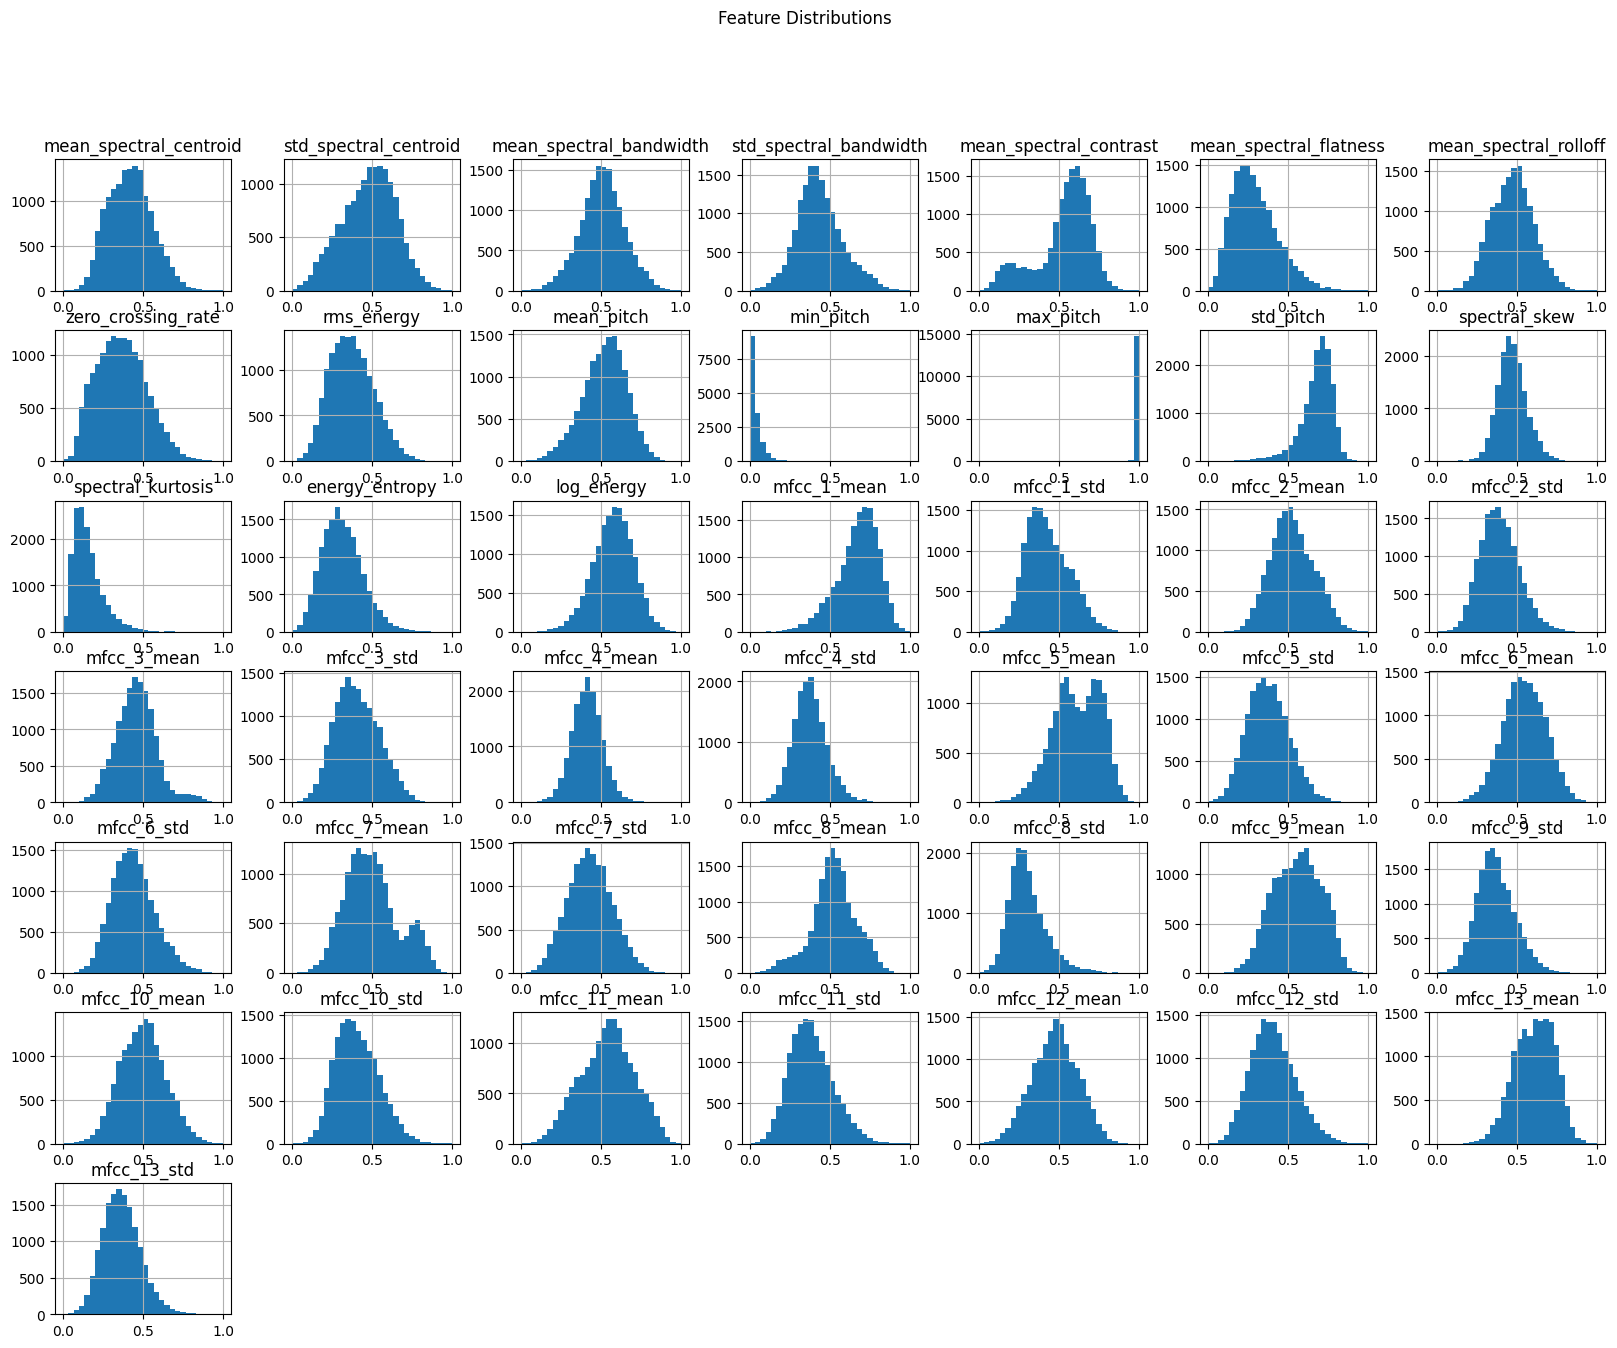

In [14]:
feature_columns = human_voice.columns[:-1]
human_voice[feature_columns].hist(bins=30, figsize=(20, 15))
plt.suptitle('Feature Distributions')
plt.show()

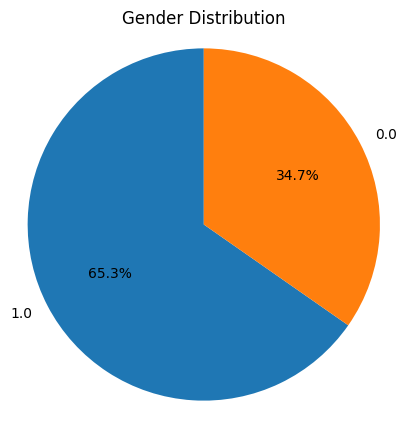

In [ ]:
# Plotting data for female and male
gender_counts = human_voice['label'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels= gender_counts.index,autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

In [13]:
X= human_voice.drop(columns='label')
y= human_voice['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 12056
Testing set size: 3014


In [58]:
# Clustering with kmeans 
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_train= kmeans.fit_predict(X_train)
silhouette_kmean= silhouette_score(X_train, kmeans_train)
print(f"Silhouette Score : {silhouette_kmean:.4f}")

Silhouette Score : 0.2014


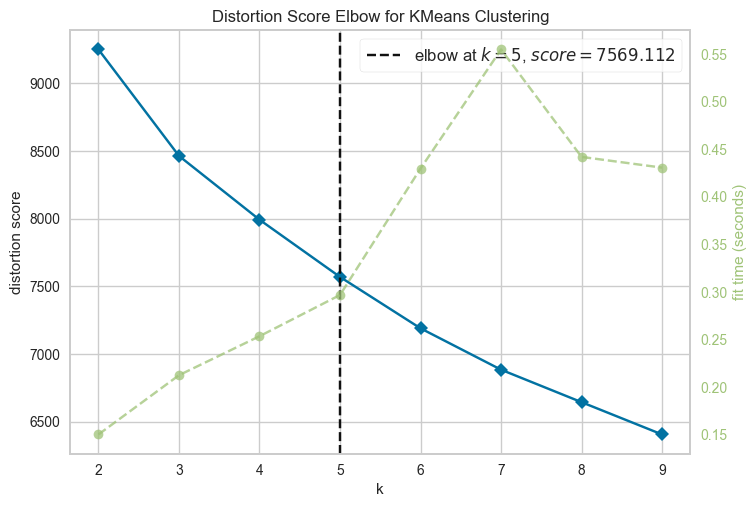

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

c:\Users\simra\OneDrive\Documents\Coding_files\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=9, n_init=10, random_state=42))

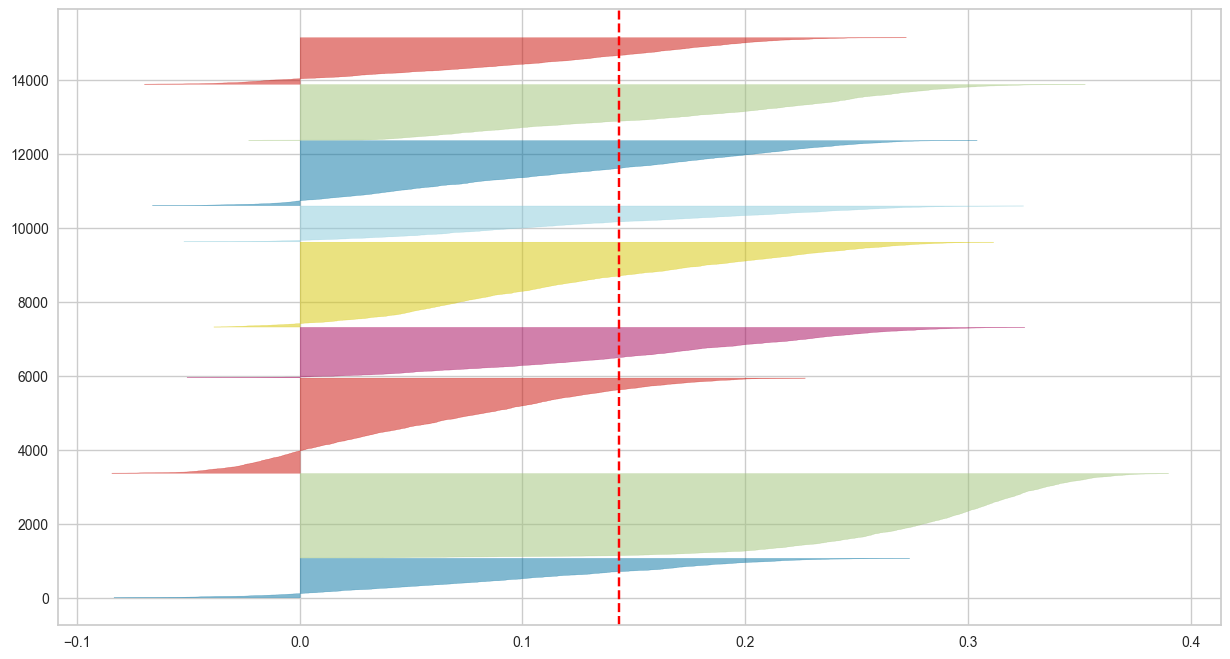

In [ ]:
# Plotting sllhoutte score for kmeans
fig, ax = plt.subplots(1, 1, figsize=(15,8))
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')   
visualizer.fit(X) 

In [24]:
df=pd.DataFrame(kmeans_train)

<Axes: ylabel='Count'>

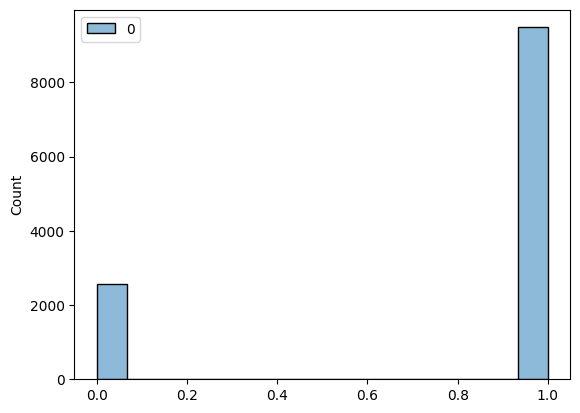

In [25]:
sns.histplot(df)

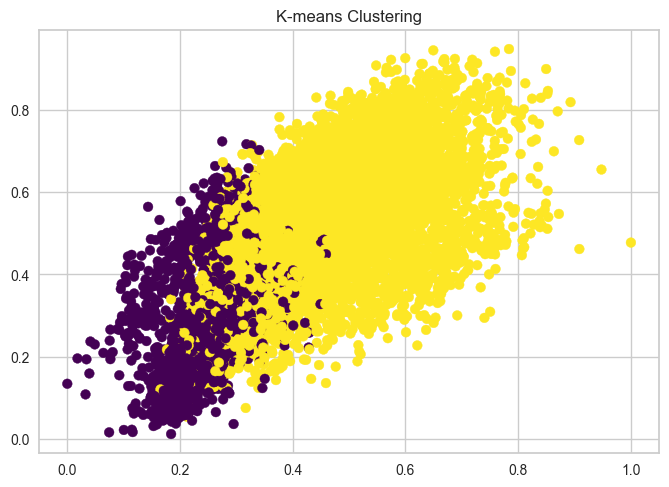

In [35]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=kmeans_train, cmap='viridis')
plt.title('K-means Clustering')
plt.show()

In [56]:
# Creating clisters with DBSCAN method
dbscan= DBSCAN(eps=0.5, min_samples=5)
dbscan_train= dbscan.fit_predict(X_train)
silhouette_dbscan= silhouette_score(X_train, dbscan_train)
print(f"Silhouette Score : {silhouette_dbscan:.4f}")

Silhouette Score : 0.0712


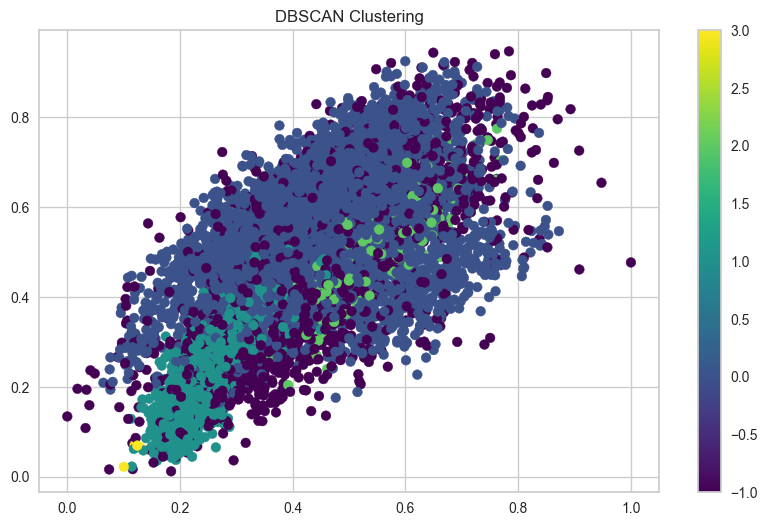

In [45]:
plt.figure(figsize=(10, 6))
scatter=plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=dbscan_train, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering')
plt.show()

Score:  0.9984074319840743
Accuracy:  0.9920371599203716
Precision:  0.9920844900482354
recall:  0.9920371599203716
f1-score:  0.9920221038407817
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1079
         1.0       0.99      1.00      0.99      1935

    accuracy                           0.99      3014
   macro avg       0.99      0.99      0.99      3014
weighted avg       0.99      0.99      0.99      3014



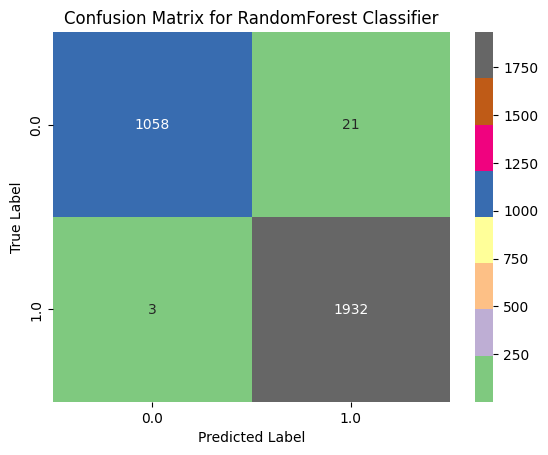

In [ ]:
# Training the data with randomforest classifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
pred_y_rf= rf.predict(X_test)
print('Score: ', rf.score(X,y))
print("Accuracy: ", accuracy_score(y_test, pred_y_rf))
print("Precision: ",precision_score(y_test, pred_y_rf, average='weighted'))
print("recall: ", recall_score(y_test, pred_y_rf, average='weighted'))
print("f1-score: ",f1_score(y_test, pred_y_rf, average='weighted'))
print(classification_report(y_test, pred_y_rf))
cm=confusion_matrix(y_test, pred_y_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Accent', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for RandomForest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Score:  0.9996018579960185
Accuracy:  0.9993364299933643
Precision:  0.9993364299933643
recall:  0.9993364299933643
f1-score:  0.9993364299933643
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1079
         1.0       1.00      1.00      1.00      1935

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



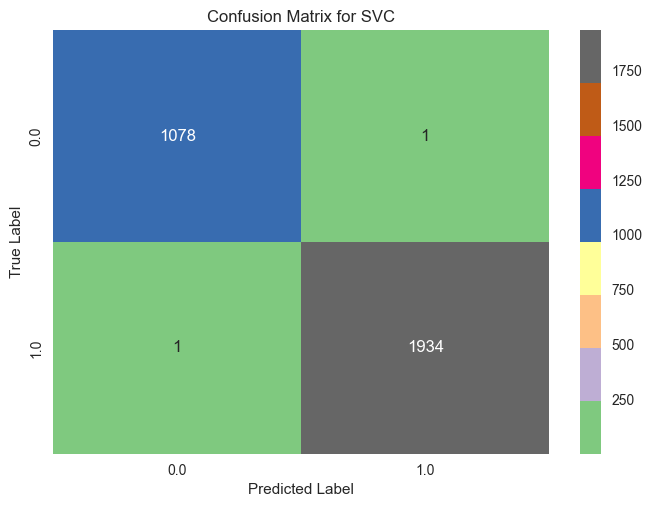

In [ ]:
# Training the data with SVC model
svm= SVC(random_state=42)
svm.fit(X_train, y_train)
pred_y_svm= svm.predict(X_test)
print('Score: ', svm.score(X,y))
print("Accuracy: ", accuracy_score(y_test, pred_y_svm))
print("Precision: ",precision_score(y_test, pred_y_svm, average='weighted'))
print("recall: ", recall_score(y_test, pred_y_svm, average='weighted'))
print("f1-score: ",f1_score(y_test, pred_y_svm, average='weighted'))
print(classification_report(y_test, pred_y_svm))
cm=confusion_matrix(y_test, pred_y_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Accent', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Score:  0.9990046449900465
Accuracy:  0.9966821499668215
Precision:  0.9966817409111747
recall:  0.9966821499668215
f1-score:  0.996681467958097
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1079
         1.0       1.00      1.00      1.00      1935

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



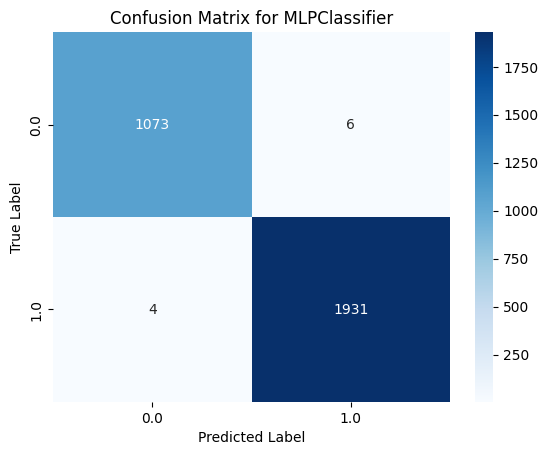

In [ ]:
# Training the data with MLP Classifier model
nnc= MLPClassifier(random_state=42, max_iter= 300)
nnc.fit(X_train, y_train)
pred_y_nnc= nnc.predict(X_test)
print('Score: ', nnc.score(X,y))
print("Accuracy: ", accuracy_score(y_test, pred_y_nnc))
print("Precision: ",precision_score(y_test, pred_y_nnc, average='weighted'))
print("recall: ", recall_score(y_test, pred_y_nnc, average='weighted'))
print("f1-score: ",f1_score(y_test, pred_y_nnc, average='weighted'))
print(classification_report(y_test, pred_y_nnc))
cm=confusion_matrix(y_test, pred_y_nnc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for MLPClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Score:  0.9993364299933643
Accuracy:  0.9993364299933643
Precision:  0.9993376576899538
recall:  0.9993364299933643
f1-score:  0.9993365656479245
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1079
         1.0       1.00      1.00      1.00      1935

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



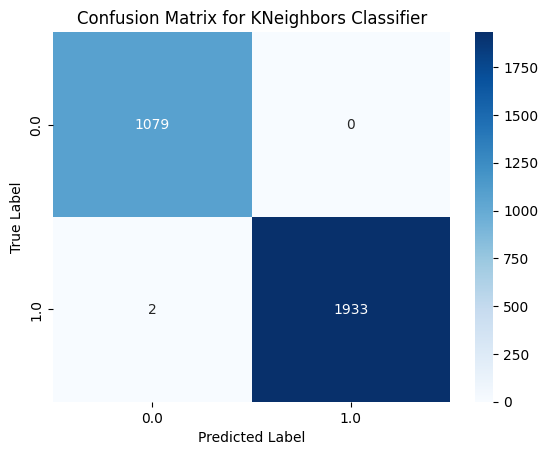

In [ ]:
# Training the data with KNN Classifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
pred_y_knn= knn.predict(X_test)
print('Score: ', knn.score(X,y))
print("Accuracy: ", accuracy_score(y_test, pred_y_knn))
print("Precision: ",precision_score(y_test, pred_y_knn, average='weighted'))
print("recall: ", recall_score(y_test, pred_y_knn, average='weighted'))
print("f1-score: ",f1_score(y_test, pred_y_knn, average='weighted'))
print(classification_report(y_test, pred_y_knn))
cm=confusion_matrix(y_test, pred_y_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

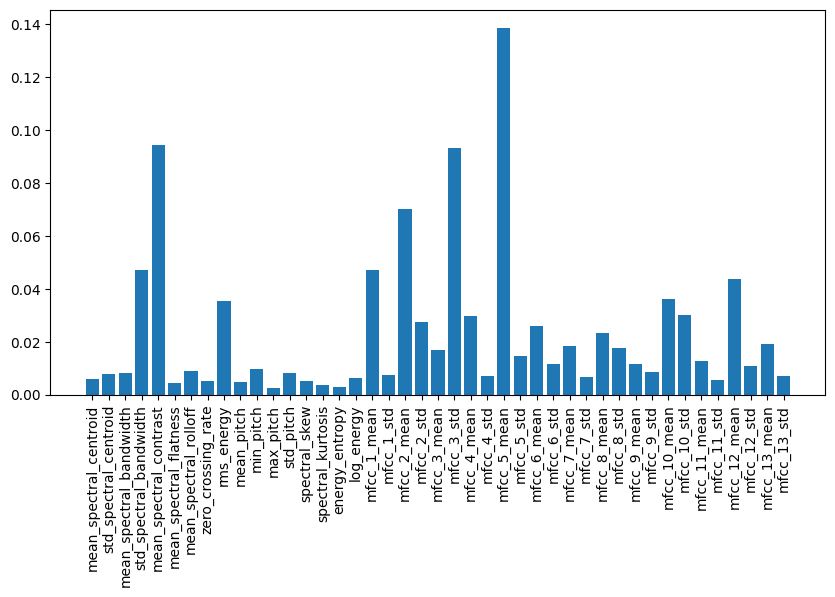

In [ ]:
# Plotting most important features
importance = rf.feature_importances_

plt.figure(figsize=(10,5))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Selecting the the top 10 most important features
feature_names= X.columns
sorted_importances = np.argsort(importance)[::-1]
top_k = 10  # Select top 10 features
top_features = [feature_names[i] for i in sorted_importances[:top_k]]

print("Top features:", top_features)

Top features: ['mfcc_5_mean', 'mean_spectral_contrast', 'mfcc_3_std', 'mfcc_2_mean', 'mfcc_1_mean', 'std_spectral_bandwidth', 'mfcc_12_mean', 'mfcc_10_mean', 'rms_energy', 'mfcc_10_std']


In [ ]:
# Training the top 10 features with random forest classifier
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

model_selected = RandomForestClassifier(random_state=42)
model_selected.fit(X_train_selected, y_train)
y_pred = model_selected.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with top features:", accuracy)

Accuracy with top features: 0.9731254147312541


In [ ]:
# Saving the model 
import pickle

with open ('model_selected.pkl','wb') as file:
    pickle.dump(model_selected, file)

with open ('scaler.pkl','wb') as file:
    pickle.dump(scaler, file)

In [55]:
%%writefile human_voice.py
import streamlit as st
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

choice= st.sidebar.selectbox("Navigator :",["Introduction","EDA","Human Voice Prediction","About me"])

# -----------------------------------------------------------------------INTRODUCTION---------------------------------------------------------------------------------------
if choice=="Introduction":
    st.title('🗣️Human Voice Classification')
    st.image('Human_voice.png')
    st.subheader('This project is related to machine learning-based model to classify and cluster human voice samples based on extracted audio features. The system will preprocess the dataset, apply clustering and classification models, and evaluate their performance. The final application will provide an interface for uploading audio samples and receiving predictions.')

# -----------------------------------------------------------------------EDA ANALYSIS--------------------------------------------------------------------------------------------
elif choice=="EDA":
    st.title('📌EDA Analysis')
    human_voice=pd.read_csv('vocal_gender_features_new.csv')
    X= human_voice.drop(columns='label')
    y= human_voice['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    eda=st.selectbox('EDA Analysis :',['Heatmap','Pairplot','Pie Chart','Confusion Matrix of Random Forest','Confusion Matrix for SVC','Confusion Matrix for KNneighbors','Confusion Matrix for MLP Classifier','KMEANS Clustering','DBSCAN Clustering'])
    if eda== 'Heatmap':
        plt.figure(figsize=(20,15))
        sns.heatmap(human_voice.corr(), annot=True, cmap='coolwarm',fmt='.2f')
        plt.title('Correlation Heatmap')
        st.pyplot(plt)

    elif eda== 'Pairplot':
        feature_columns = human_voice.columns[:-1]
        human_voice[feature_columns].hist(bins=30, figsize=(20, 15))
        plt.suptitle('Feature Distributions')
        st.pyplot(plt)
    
    elif eda=='Pie Chart':
        gender_counts = human_voice['label'].value_counts()
        plt.figure(figsize=(5,5))
        plt.pie(gender_counts, labels= gender_counts.index,autopct='%1.1f%%', startangle=90)
        plt.title('Gender Distribution')
        plt.axis('equal')
        st.pyplot(plt)
    
    elif eda=='Confusion Matrix of Random Forest':
        rf=RandomForestClassifier(random_state=42)
        rf.fit(X_train, y_train)
        pred_y_rf= rf.predict(X_test)
        cm=confusion_matrix(y_test, pred_y_rf)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Accent', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.title('Confusion Matrix for RandomForest Classifier')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        st.pyplot(plt)

    elif eda=='Confusion Matrix for SVC':
        svm= SVC(random_state=42)
        svm.fit(X_train, y_train)
        pred_y_svm= svm.predict(X_test)
        cm=confusion_matrix(y_test, pred_y_svm)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Accent', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.title('Confusion Matrix for SVC')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        st.pyplot(plt)

    elif eda=='Confusion Matrix for KNneighbors':
        knn = KNeighborsClassifier(n_neighbors=4)
        knn.fit(X_train, y_train)
        pred_y_knn= knn.predict(X_test)
        cm=confusion_matrix(y_test, pred_y_knn)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.title('Confusion Matrix for KNeighbors Classifier')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        st.pyplot(plt)

    elif eda=='Confusion Matrix for MLP Classifier':
        nnc= MLPClassifier(random_state=42, max_iter= 300)
        nnc.fit(X_train, y_train)
        pred_y_nnc= nnc.predict(X_test)
        cm=confusion_matrix(y_test, pred_y_nnc)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.title('Confusion Matrix for MLPClassifier')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        st.pyplot(plt)

    elif eda=='KMEANS Clustering':
        kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
        kmeans_train= kmeans.fit_predict(X_train)
        plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=kmeans_train, cmap='viridis')
        plt.title('K-means Clustering')
        st.pyplot(plt)

    elif eda=='DBSCAN Clustering':
        dbscan= DBSCAN(eps=0.5, min_samples=5)
        dbscan_train= dbscan.fit_predict(X_train)
        plt.figure(figsize=(10, 6))
        scatter=plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=dbscan_train, cmap='viridis')
        plt.colorbar(scatter)
        plt.title('DBSCAN Clustering')
        st.pyplot(plt)

# ---------------------------------------------------------------------------------HUMAN VOICE PREDICTION---------------------------------------------------------------------------

elif choice=="Human Voice Prediction":
    st.title('🔊Human Voice Prediction')

    model = pickle.load(open('model_selected.pkl', 'rb'))
    scaler = pickle.load(open('scaler.pkl', 'rb'))

    mfcc_5_mean= st.number_input('mcff_5_mean')
    mean_spectral_contrast= st.number_input('mean_spectral_contrast')
    mfcc_3_std= st.number_input('mfcc_3_std')
    mfcc_2_mean= st.number_input('mfcc_2_mean')
    mfcc_1_mean= st.number_input('mfcc_1_mean')
    std_spectral_bandwidth= st.number_input('std_spectral_bandwidt')
    mfcc_12_mean= st.number_input('mfcc_12_mean')
    mfcc_10_mean= st.number_input('mfcc_10_mean')
    rms_energy= st.number_input('rms_energy')
    mfcc_10_std= st.number_input('mfcc_10_std')


    
    human_voice=pd.read_csv('vocal_gender_features_new.csv')

    if st.button('Predict Gender Voice'):
        input_data= np.array([[mfcc_5_mean,mean_spectral_contrast,mfcc_3_std,mfcc_2_mean,mfcc_1_mean,std_spectral_bandwidth,mfcc_12_mean,mfcc_10_mean,rms_energy,mfcc_10_std]])
        
        prediction = model.predict(input_data)
        st.success(f"Predicted Gender: {prediction}")

elif choice=="About me":
    st.title('👩‍💻About Me')
    st.image("AboutMe.webp")
    st.write("""
    Developed by: Simran Paul

    email: simranpaul1010@gmail.com
    
    *Skills : Machine Learning , Data preparation, Feature Engeneering 

    I am very passionate to grasp new skills and very quick adaptive to learning environment!!
    """)



Overwriting human_voice.py


In [51]:
!streamlit run human_voice.py

^C
